In [1]:
%load_ext lab_black

# Correlation and Regression

## Measures of Relation Between Variables

In the last week we mainly focused on a single variable, describing a distribution and calculating summary statistics. Statistics that describe a single variable are referred to as univariate statistics. If we examine the relationship of two variables, we refer to bivariate statistics. If the relationships among several variables are simultaneously examined, we refer to multivariate statistics. Measures of relation provide a means of summarizing the size of the relation between two variables

### The Covariance 

The [**covariance**](https://en.wikipedia.org/wiki/Covariance) is a measure of the joint variability of two variables. The covariance can take any value in the interval $(- \infty, \infty)$. The covariance is positive, if the greater/smaller values of one variable mainly correspond with the greater/smaller values of the other variable. The covariance is negative if the variables tend to show opposite behavior. If greater values of one variable mainly correspond to the lesser values of the other.

The covariance, $s_{xy}$, is calculated by the equation

$$s_{xy}=\frac{\sum_{i=1}^n(x_i-\bar x)(y_i-\bar y)}{n-1}$$

The normalized version of the covariance, is called correlation coefficient, which magnitude indicates the strength of a linear relation between two variables.


The **normalized version of the covariance**, is called  **correlation coefficient**, which magnitude indicates the strength of a linear relation between two variables.

***

### Correlation

####  Pearson Correlation coefficient


Correlation is a commonly used method to examine the relationship between **quantitative variables**. The most commonly used statistic is the **linear correlation coefficient**, $r$, which is also known as the [**Pearson product moment correlation coefficient**](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) in honor of its developer, [Karl Pearson](https://en.wikipedia.org/wiki/Karl_Pearson). Is it given by

$$r = \frac{\sum_{i=1}^n(x_i- \bar x)(y_i - \bar y)}{\sqrt{\sum_{i=1}^n(x_i- \bar x)^2}\sqrt{\sum_{i=1}^n(y_i- \bar y)^2}}=\frac{s_{xy}}{s_x s_y}\text{,}$$

where $s_{xy}$ is the covariance of $x$ and $y$ and $s_x$ and $s_y$ the standard deviation of $x$ and $y$, respectively. By dividing by the sample standard deviations, $s_x$ and $s_y$, the linear correlation coefficient, $r$, becomes scale independent and takes values between $-1$ and $1$.


The linear correlation coefficient measures the strength of the linear relationship between two variables. If $r$ is close to $\pm 1$, the two variables are highly correlated and if plotted on a scatter plot, the data points cluster about a line. If $r$ is far from $\pm 1$, the data points are more widely scattered. If $r$ is near $0$, the data points are essentially scattered about a horizontal line indicating that there is almost no linear relationship between the variables.




<div>
<img src="4_regression_figures/Korrelationen.png" width="800"/>
</div>

An interesting property of $r$ is, that its sign reflects the slope of the linear relationship between two variables. A positive value of $r$ suggests that the variables are **positively linearly correlated**, indicating that $y$ tends to increase linearly as $x$ increases. A negative value of $r$ suggests that the variables are **negatively linearly correlated**, indicating that $y$ tends to decrease linearly as $x$ increases.

There is no unambiguous classification rule for the quantity of a linear relationship between two variables. However, the following table may serve a as rule of thumb how to address the numerical values of Pearson product moment correlation coefficient.

$$
\begin{array}{lc}
\hline
\ \text{Strong linear relationship} & r > 0.9 \\
\ \text{Medium linear relationship} & 0.7 < r \le 0.9\\
\ \text{Weak linear relationship} & 0.5 < r \le 0.7 \\
\ \text{No or doubtful linear relationship} & 0 < r \le 0.5 \\
\hline 
\end{array}
$$

Pearson's correlation assumes the variables to be roughly normally distributed and it is not robust in the presence of outliers.

In the section on LINEAR REGRESSION we discussed the coefficient of determination, $R^2$, a descriptive measure for the quality of linear models. There is a close relation between $R^2$ and the linear correlation coefficient, $r$. The coefficient of determination, $R^2$, equals the square of the linear correlation coefficient, $r$.


$$\text{coefficient of determination }(R^2) =r^2 $$

***

###  Pearson correlation coefficient: An example

In order to get some intuition we calculate the Pearson product moment correlation coefficient in an example. 

In [2]:
# First, let's import all the needed libraries.


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression

import warnings

warnings.filterwarnings("ignore", "use_inf_as_na")

In [3]:
import requests, zipfile, io

url = "http://userpage.fu-berlin.de/soga/soga-py/300/307000_time_series/tageswerte_KL_00403_19500101_20211231_hist.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extract("produkt_klima_tag_19500101_20211231_00403.txt", "../data")
data_raw = pd.read_csv(
    "../data/produkt_klima_tag_19500101_20211231_00403.txt",
    sep=";",
    na_values=["-999"],
    skipinitialspace=True,
)
data_raw

,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
0,403,19500101,NaN,NaN,NaN,5,2.2,7,NaN,0.0,5.0,4.0,1025.60,-3.2,83.00,-1.1,-4.9,-6.3,eor
1,403,19500102,NaN,NaN,NaN,5,12.6,8,NaN,0.0,8.0,6.1,1005.60,1.0,95.00,2.2,-3.7,-5.3,eor
2,403,19500103,NaN,NaN,NaN,5,0.5,1,NaN,0.0,5.0,6.5,996.60,2.8,86.00,3.9,1.7,-1.4,eor
3,403,19500104,NaN,NaN,NaN,5,0.5,7,NaN,0.0,7.7,5.2,999.50,-0.1,85.00,2.1,-0.9,-2.3,eor
4,403,19500105,NaN,NaN,NaN,5,10.3,7,NaN,0.0,8.0,4.0,1001.10,-2.8,79.00,-0.9,-3.3,-5.2,eor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26293,403,20211227,NaN,NaN,NaN,3,0.0,8,0.183,0.0,5.9,3.8,998.13,-3.7,79.67,-0.7,-7.9,-9.9,eor
26294,403,20211228,NaN,NaN,NaN,3,1.5,6,0.000,0.0,6.4,5.3,990.17,-0.5,88.46,2.7,-3.9,-5.1,eor
26295,403,20211229,NaN,NaN,NaN,3,0.3,6,0.000,0.0,7.5,8.2,994.40,4.0,100.00,5.6,1.8,0.0,eor
26296,403,20211230,NaN,NaN,NaN,3,3.2,6,0.000,0.0,7.9,11.5,1001.70,9.0,98.54,12.7,4.6,2.3,eor


In [4]:
# Remove unnecessary columns
### By looking at the data and consulting the variable description,
### we can immediately find variables that are not useful for our purpose and drop them.

df = data_raw.drop(
    columns=[
        "STATIONS_ID",
        "MESS_DATUM",
        "QN_3",
        "FX",
        "FM",
        "NM",
        "eor",
        "QN_4",
        "RSK",
        "RSKF",
        "SHK_TAG",
        "SDK",
        "UPM",
        "VPM",
    ]
)
## rename for convenience:

df = df.rename(
    columns={
        "PM": "pres",
        "TMK": "temp",
        "TXK": "temp_max",
        "TNK": "temp_min",
        "TGK": "temp_sfc",
    }
)
df

,pres,temp,temp_max,temp_min,temp_sfc
0,1025.60,-3.2,-1.1,-4.9,-6.3
1,1005.60,1.0,2.2,-3.7,-5.3
2,996.60,2.8,3.9,1.7,-1.4
3,999.50,-0.1,2.1,-0.9,-2.3
4,1001.10,-2.8,-0.9,-3.3,-5.2
...,...,...,...,...,...
26293,998.13,-3.7,-0.7,-7.9,-9.9
26294,990.17,-0.5,2.7,-3.9,-5.1
26295,994.40,4.0,5.6,1.8,0.0
26296,1001.70,9.0,12.7,4.6,2.3


In [5]:
df.dropna(axis=0, inplace=True)
df

,pres,temp,temp_max,temp_min,temp_sfc
0,1025.60,-3.2,-1.1,-4.9,-6.3
1,1005.60,1.0,2.2,-3.7,-5.3
2,996.60,2.8,3.9,1.7,-1.4
3,999.50,-0.1,2.1,-0.9,-2.3
4,1001.10,-2.8,-0.9,-3.3,-5.2
...,...,...,...,...,...
26293,998.13,-3.7,-0.7,-7.9,-9.9
26294,990.17,-0.5,2.7,-3.9,-5.1
26295,994.40,4.0,5.6,1.8,0.0
26296,1001.70,9.0,12.7,4.6,2.3


In [6]:
### Drop missing data
## As a next step, we check the data for missing values.
df.isnull().sum()

pres        0
temp        0
temp_max    0
temp_min    0
temp_sfc    0
dtype: int64

#### Feature scaling
 
In the next steps it is exaplained how to transform the data to make the different variables (feature) comparable with each other **min-max scaling** and **logistic transformation** which transforms e.g. skew-symmetric data to a normally distributed data set.
We comment the code, because our data is normally distributed. But you need it later for dealing with different data. 

#####  Min-Max scaling

The min-max scaling

$$x'=\frac{x-x_{min}}{x_{max}-x_{min}}$$


transforms the data into the range $[0,1]$. We want to avoid getting values with 0, because in the second step we need the logarithm of the values. Therefore, we use slightly larger boundary values $x_{min}-1$ and $x_{max}+1$. Thus

$$x'=\frac{x-x_{min}+1}{x_{max}-x_{min}+2\, .}$$

##### Logistic transformation

As a second step, we use a logistic transformation
$$x''=\log\frac{x'}{1-x'}$$

However, before we can start the transformation, we face a problem! Because we have transformed the test set with the values of the training set, the test set may contain values outside the range [0,1]. This will not work with the logarithm in the transformation.

##### Back transformation

The back transformation is the “logistic” function resp. inverse logit:

\begin{align}
x''\to x'=\frac{e^{x''}}{1+e^{x''}}&& and &&
x'\to x=(x'+l)\cdot(u-l)
\end{align}

\begin{align}
&& resp. && 
x'\to x= ({x'+x_{min}+1})\cdot(x_{max}-x_{min}+2)
\end{align}


In [7]:
def min_max(variable):
    xmin, xmax = variable.min(), variable.max()
    min_max_done = (variable - xmin + 1) / (xmax - xmin + 2)
    return xmin, xmax, min_max_done

In [8]:
def log_transform(min_max_variable):
    return np.log(min_max_variable / (1 - min_max_variable))

In [9]:
# backtransform
## reverse min max und perform exp()
def inv_logit(xmin, xmax, logit_transf_variable):
    return (xmin - 1) + (xmax - xmin + 2) * np.exp(logit_transf_variable) / (
        1 + np.exp(logit_transf_variable)
    )

In [10]:
### log tranform your variable

df_transfo = df.copy()
transform_cols = [
    "temp",
    "temp_max",
    "temp_min",
    "temp_sfc",
]  # ["COLUMN NAME", "COLUMN NAME"]

xmin, xmax, df_transfo[transform_cols] = min_max(df_transfo[transform_cols])

df_transfo[transform_cols] = log_transform(df_transfo[transform_cols])

## calculate mean & median tranform back:
inv_logit(xmin, xmax, df_transfo[transform_cols].mean()), inv_logit(
    xmin, xmax, df_transfo[transform_cols].median()
)

(temp         9.767871
 temp_max    13.886515
 temp_min     5.842247
 temp_sfc     4.349503
 dtype: float64,
 temp         9.5
 temp_max    13.6
 temp_min     5.5
 temp_sfc     3.7
 dtype: float64)

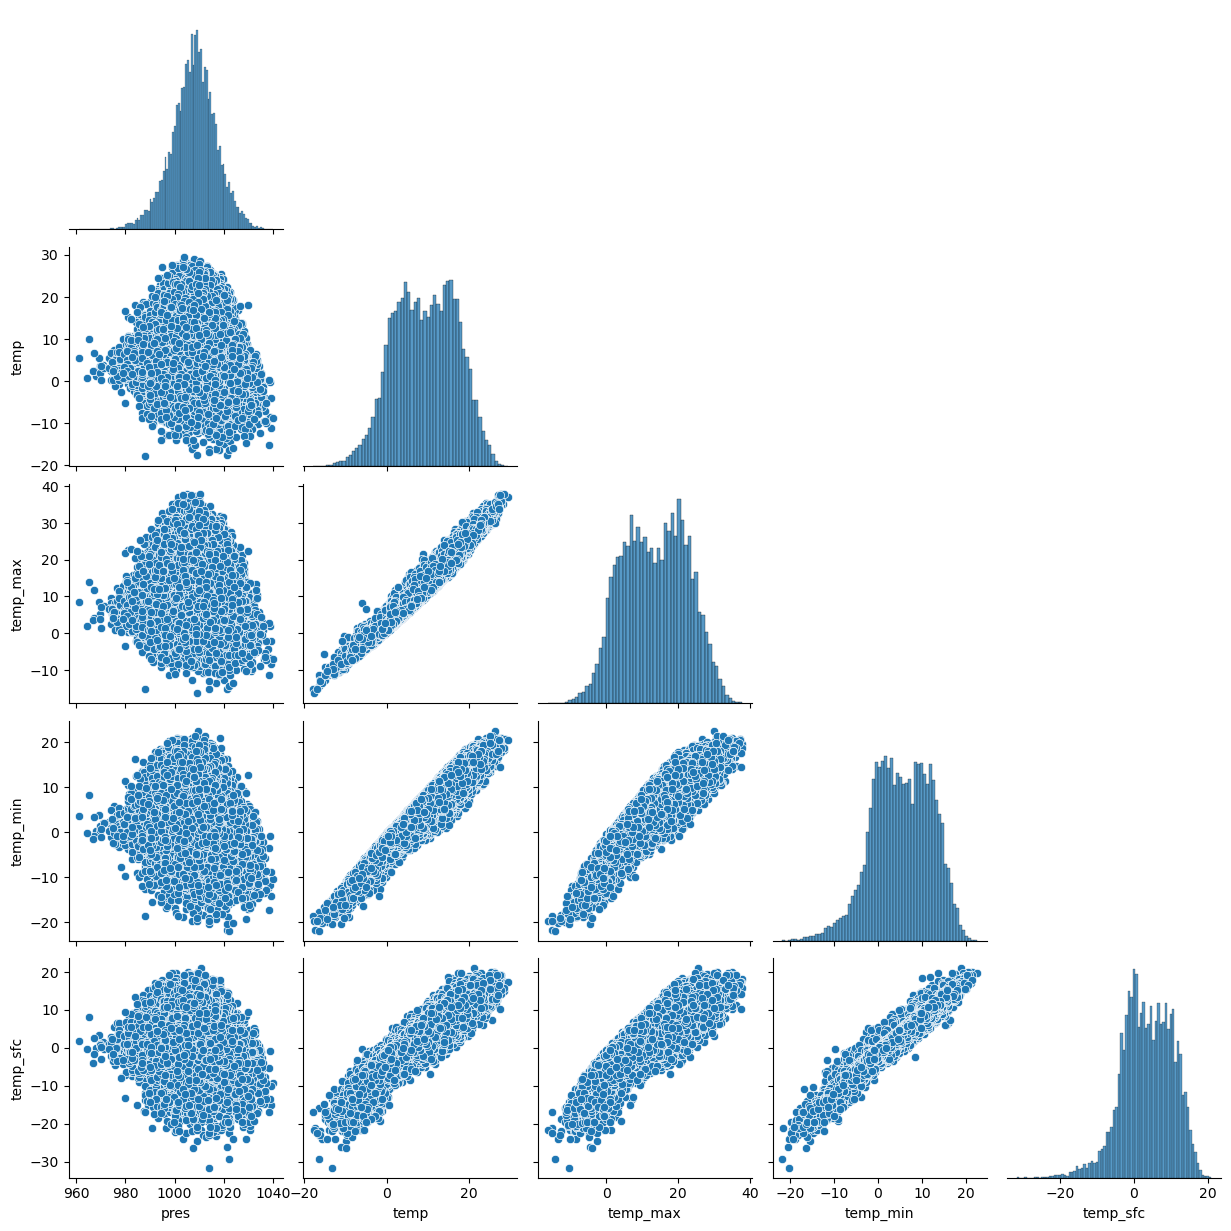

In [11]:
sns.pairplot(df, corner=True)
plt.show()

It looks like a correlation of the minimum and maximum temperature. 


The scatter plot indicates that there exists an linear relationship between the two variables under consideration. 

For the sake of this exercise we calculate the linear correlation coefficient by hand at first, and then we apply the `pearsonr()` function in Python.

Recall the equation from above

$$r = \frac{\sum_{i=1}^n(x_i- \bar x)(y_i - \bar y)}{\sqrt{\sum_{i=1}^n(x_i- \bar x)^2}\sqrt{\sum_{i=1}^n(y_i- \bar y)^2}}=\frac{s_{xy}}{s_x s_y}$$

r is called **Pearsons correlation coefficient**. To calculate the mean and the square roots, we import the `numpy module`.

In [13]:
x = df.temp_min
y = df.temp_max

In [14]:
x_bar = np.mean(x)
y_bar = np.mean(y)

sum((x - x_bar) * (y - y_bar)) / (
    np.sqrt(sum((x - x_bar) ** 2)) * np.sqrt(sum((y - y_bar) ** 2))
)

0.9083940788660801

As a sanity check we calculate the ration of the covariance of $x$ and $y$ and the standard deviation of $x$ and $y$: 

$$r =\frac{s_{xy}}{s_x s_y}$$

We use the numpy module to calculate the standard deviations `np.std()` and the covariance `np.cov(x,y)`.

But! Using numpy, `np.cov(a,b)` gives us the covariance matrix

$$\begin{pmatrix}
cov(a,a) &  cov(a,b) \\
cov(b,a) & cov(b,b) \\
\end{pmatrix}$$

Therefore, use `numpy.cov(a,b)[0][1]` for the matrix element cov(a,b)

In [15]:
np.cov(x, y)[0][1] / (np.std(x) * np.std(y))

0.9084286330172082

Finally, from the `module from scipy.stat`  we `import pearsonr` to calculate Pearson's correlation coefficient that we called r above. 

In [16]:
from scipy.stats import pearsonr

corr = pearsonr(x, y)[0]
print(corr)

0.9083940788660892


Perfect. The three calculations yield the same result! 

We may conclude, that there is a strong linear correlation between the minimum and maximum temperature at the weather station in Dahlem!

> ##### **Exercise:**
> Take the data set of the weather station in Dahlem and calculate the correlation-coefficient after Pearson for different time dependent variables and provide the coefficients of determination!

In [ ]:
### your code here ###

##### solution

In [ ]:
# do each column by hand ....
pearsonr(df['temp_min'],df['temp_max'])

# or easily use the .corr() function of the entire df:

df.corr(method = "pearson")

#### Pairwise Correlations

Of course a correlation analysis is not restricted to two variables. Thanks to statistical software packages, we are able to conduct a pairwise correlation analysis for more than two variables. Let us first prepare the data set. For a better visualization experience we may draw again 100  randomly picked time steps of the data set. Then we select a number of variables to perform correlation analysis.


In [17]:
df_sample = df.sample(n=100, replace=False, random_state=1)

The `corr()` function returns a nice table, also called **correlation matrix**,  with the pairwise Pearson's correlation coefficients. Obviously some variables contain missing values, denoted as `NaN`. 

In [18]:
corrMatrix = df.corr()

corrMatrix

,pres,temp,temp_max,temp_min,temp_sfc
pres,1.000000,-0.069212,-0.042117,-0.123350,-0.125634
temp,-0.069212,1.000000,0.981847,0.952269,0.902622
temp_max,-0.042117,0.981847,1.000000,0.908394,0.852836
temp_min,-0.123350,0.952269,0.908394,1.000000,0.975749
temp_sfc,-0.125634,0.902622,0.852836,0.975749,1.000000


A table is nice representation for a correlation analysis, but a figure of course would improve the interpretability. Import the `seaborn` and the `matplotlib` packages for plotting the correlation matrices. The NaN data fields are empty. 

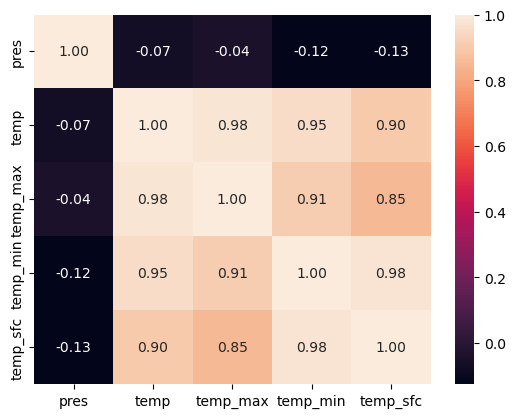

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corrMatrix, annot=True, fmt=".2f")
plt.show()

Which variables are highly correlated with each other?

> ##### **Exercise**:
> 
> Create a correlation plot for the original data (df) and one for the transformed data (df_transfo). Both should be displayed in one figure but 1 subplot each.  Are there differences between the two plots? Which variables are no longer or more strongly correlated? How can these differences be explained? 

In [ ]:
### your code here ###

##### solution

In [20]:
df.corr()

,pres,temp,temp_max,temp_min,temp_sfc
pres,1.000000,-0.069212,-0.042117,-0.123350,-0.125634
temp,-0.069212,1.000000,0.981847,0.952269,0.902622
temp_max,-0.042117,0.981847,1.000000,0.908394,0.852836
temp_min,-0.123350,0.952269,0.908394,1.000000,0.975749
temp_sfc,-0.125634,0.902622,0.852836,0.975749,1.000000


In [21]:
df_transfo.corr()

,pres,temp,temp_max,temp_min,temp_sfc
pres,1.000000,-0.066808,-0.042975,-0.118797,-0.116435
temp,-0.066808,1.000000,0.980614,0.945663,0.891206
temp_max,-0.042975,0.980614,1.000000,0.901528,0.842826
temp_min,-0.118797,0.945663,0.901528,1.000000,0.972604
temp_sfc,-0.116435,0.891206,0.842826,0.972604,1.000000


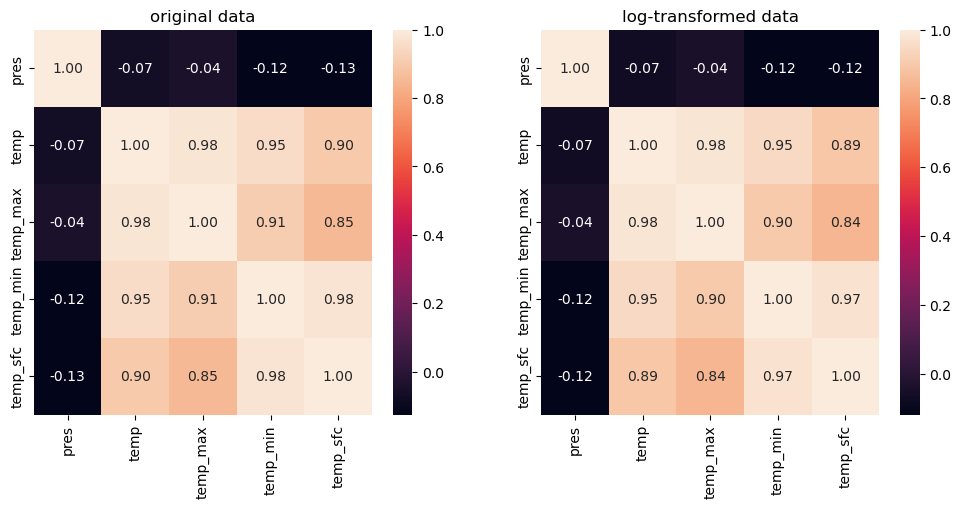

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))


sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax[0])
sns.heatmap(df_transfo.corr(), annot=True, fmt=".2f", ax=ax[1])

ax[0].set_title("original data")
ax[1].set_title("log-transformed data")
plt.show()

###  Spearman's rank correlation coefficient

[**Spearman's rank correlation coefficient**](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient), also known as the Spearman's $\rho$ is a non-parametric rank correlation coefficient. It was developed by [Charles Spearman](https://en.wikipedia.org/wiki/Charles_Spearman) and is an alternative to Pearson's product moment correlation coefficient. The Spearman $\rho$ rank correlation coefficient is denoted by $r_s$ for sample data and by $\rho_s$ for population data (Mann 2012). The correlation coefficient assesses the monotonic relationship between two variables and ranges between $-1$ and $1$. It describes the linear correlation between the ranks of the data on variables $x$ and $y$. Spearman's correlation is high when the variables have a similar rank, and low when variables have a dissimilar rank.

To calculate $r_s$, the data for each variable, $x$ and $y$, is ranked separately. The difference between each pair of ranks and denote it by $d$. For a given bivariate sequence $(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)$ Spearman's $r_s$  is given by

$$r_s=1-\frac{6\sum_{i=1}^n (r_{xi}-r_{yi})^2}{n(n^2-1)}\text{,}$$
where $r_{xi}=Rank(x_i)$ , $r_{yi}= Rank(y_i)$ , and $n$ is the sample size.

In contrast to Pearson's linear correlation coefficient Spearman's linear coefficient is appropriate for both quantitative and ordinal variables. In addition rank based correlations are not dependent on the normal distributional assumption are more resistant to outliers (Schumann 2010).


####  Spearman's rank correlation coefficient: An example

Let us consider an example. The population of a community along a river believes that recent increases in peak discharge rates are due to deforestation by a logging company in recent years. We calculate Spearman's rank correlation coefficient to assess if there is a correlation between peak discharge (Durchfluss) and the faction of deforestation (Abholzung) area in the watershed (data modified after [McCuen 2003, p. 112](https://www.crcpress.com/Modeling-Hydrologic-Change-Statistical-Methods/McCuen/p/book/9781566706001)).

$$
\begin{array}{lcc}
\hline
\ \text{Year} & \text{Discharge (m}^3 \text{s}^{-1}) & \text{Logging area (\%)} \\
\hline 
\ 1982 & 227 & 53  \\
\ 1983 & 249 & 56  \\
\ 1984 & 210 & 57 \\
\ 1985 & 190 & 58  \\
\ 1986 & 314 & 55  \\
\ 1987 & 345 & 54 \\
\ 1988 & 161 & 51  \\
\ 1988 & 266 & 50  \\
\ 1989 & 402 & 49 \\
\ 1990 & 215 & 57  \\
\ 1991 & 164 & 46  \\
\ 1992 & 405 & 44 \\
\ 1993 & 328 & 43 \\
\ 1994 & 294 & 42 \\
\hline \\
\end{array}
$$

Let us construct our data vectors. We assign the years to the variable `year`, the discharge values to the variable `Q` and the logging area to the variable `logged`.


In [23]:
year = np.array(
    [1982, 1983, 1984, 1985, 1986, 1987, 1988, 1988, 1989, 1990, 1991, 1992, 1993, 1994]
)
Q = np.array([227, 249, 210, 190, 314, 345, 161, 266, 402, 215, 164, 405, 328, 294])
logged = np.array([53, 56, 57, 58, 55, 54, 51, 50, 49, 47, 46, 44, 43, 42])

print("Year = ", year)
print("Q = ", Q)
print("logged =", logged)

Year =  [1982 1983 1984 1985 1986 1987 1988 1988 1989 1990 1991 1992 1993 1994]
Q =  [227 249 210 190 314 345 161 266 402 215 164 405 328 294]
logged = [53 56 57 58 55 54 51 50 49 47 46 44 43 42]


> [**Spearman's rank correlation coefficient**](https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Descriptive-Statistics/Measures-of-Relation-Between-Variables/Correlation/index.html)
> 
> Spearman's  ρ  is a non-parametric rank correlation coefficient. It was developed by Charles Spearman and is an alternative to the Pearson product moment correlation coefficient. The Spearman's rank correlation coefficient is denoted by $r_{s}$ for sample data and by $ρ_{s}$ for population data (Mann 2012). The correlation coefficient assesses the monotonic relationship between two variables and ranges between  $−1$ and $1$. It describes the linear correlation between the ranks of the data of variables x and y. Spearman's correlation is high when the variables have a similar rank and low when variables have a dissimilar rank. In contrast to Pearson's linear correlation coefficient Spearman's linear correlation coefficient is appropriate for both, quantitative and ordinal, variables. In addition, rank based correlations are not dependent on the assumption of a normal distribution and are more resistant to outliers (Schumann 2010).

First we calculate **Spearman's rank correlation coefficient** by hand. Recall the equation

$$r_s=1-\frac{6\sum_{i=1}^n (r_{xi}-r_{yi})^2}{n(n^2-1)}\text{,}$$

where $r_{xi}=Rank(x_i)$ , $r_{yi}= Rank(y_i)$ , and $n$ is the sample size. 

Next, we create a `pandas DataFrame` with the above assigned values:

In [24]:
# The vectors year, Q and logged need to have the same length to create
# data frame

n = len(Q)
m = len(year)
s = len(logged)
print(n, m, s)


# create a new pandas data frame:
d = {"Year": year, "Q": Q, "logged": logged}
df_ex = pd.DataFrame(data=d)

df_ex

14 14 14


,Year,Q,logged
0,1982,227,53
1,1983,249,56
2,1984,210,57
3,1985,190,58
4,1986,314,55
5,1987,345,54
6,1988,161,51
7,1988,266,50
8,1989,402,49
9,1990,215,47


We apply the `rank()` function to calculate the rank for the values of each variable. Then, we calculate **Spearman's rank correlation coefficient** by hand:

In [25]:
r_xi = df_ex["Q"].rank()
r_yi = df_ex["logged"].rank()

rs = 1 - ((6 * sum((r_xi - r_yi) ** 2)) / (n * (n**2 - 1)))
print(rs)

-0.34065934065934056


As Spearman’s rank correlation coefficient is nothing else but Pearson’s linear correlation coefficient on the ranked data. The result the following code cell should equal the previous results.

Alternatively to the above calculation, we load the funktion `spearmanr`of the modue `scipy.stats`:


In [26]:
from scipy.stats import spearmanr

corr = spearmanr(Q, logged)[0]
print(corr)

-0.3406593406593406


Perfect, we got the same result by all three calculations! The results indicate that there is no to a weak negative correlation between peak discharge and logging area. In other words, the discharge tends to decrease when the logging area increases. Thus, the perception of the population can not be confirmed by out statistical analysis.

***

### Spearman's rank correlation coefficient: A second example

Analogously to the Pearson correlation, we can calculate the correlation matrix with respect to the Spearman correlation:

In [27]:
corrMatrix_spearman = df_transfo.corr(method="spearman")
corrMatrix_spearman

,pres,temp,temp_max,temp_min,temp_sfc
pres,1.000000,-0.063239,-0.039928,-0.118206,-0.120218
temp,-0.063239,1.000000,0.982374,0.951269,0.901883
temp_max,-0.039928,0.982374,1.000000,0.908758,0.853738
temp_min,-0.118206,0.951269,0.908758,1.000000,0.975820
temp_sfc,-0.120218,0.901883,0.853738,0.975820,1.000000


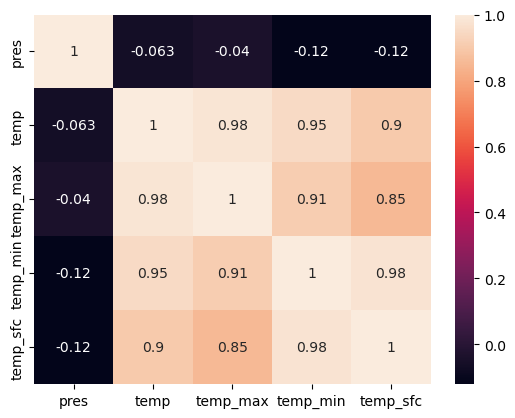

In [28]:
sns.heatmap(corrMatrix_spearman, annot=True)
plt.show()


|         | Q     | LF    | NO3   | SO4  | Ca   | Mg  | PO4 2-  | Fe3+ |
|---------|-------|-------|-------|------|------|-----|---------|------|
| Q       | 1     |       |       |      |      |     |         |      |
| LF      | -0,87 | 1     |       |      |      |     |         |      |
| NO3     | 0,61  | -0,84 | 1     |      |      |     |         |      |
| SO4     | -0,74 | 0,88  | **-0,36** | 1    |      |     |         |      |
| Ca      | -0,56 | 0,73  | -0,67 | 0,69 | 1    |     |         |      |
| Mg      | -0,44 | 0,7   | -0,62 | 0,62 | 0,38 | 1   |         |      |
| PO4 2-  | -0,7  | 0,81  | 0,86  | **0,31** | 0,76 |  0,71   | 1       |      |
| Fe3+    | -0,65 | 0,77  | -0,76 | **0,84** | 0,71 | 0,7 | -0,81   | 1    |

> ehemaliger Braunkohleabbau (Fe3+, SO4 2-) oder die Landwirtschaft (PO43-, NO3, SO4 2-) ?
> Korrelation zwischen Fe3+ und SO4 am höchsten --> also vermutlich verlaufen die Fließpfade durch ehem. Braunkohleabbaugebiete oder werden durch diese beeinfliusst.

In [ ]:

plt.plot(elev_NN, precip)

corr = spearmanr(elev_NN, precip)[0]
print(corr)
corr = pearsonr(elev_NN, precip)[0]
print(corr)

In [ ]:
x = elev_NN
y = precip

# we have to reshape the regressors 
x = x.reshape((-1, 1))

# set up the linear model
model = LinearRegression()

# find the linear function that fits the min/max temperature best:
model.fit(x, y)

## Now, we can easily plot using the 2 coefficients: m*x +n -->
plt.scatter(x,y)
plt.plot(x, model.coef_*x + model.intercept_, color = "red")

In [ ]:
## predict from y to x--> input is precip

## transform the input with min max and log as well 
sample= np.array([400])



# max temp:
x_pred = (sample - model.intercept_) / model.coef_ 

print(x_pred)

#inv_logit(logit_transf_variable = x_pred, xmin = elev_min, xmax = elev_max)

In [ ]:
### predict from x to y
baumgrenze = np.array([0])
baumgrenze = baumgrenze.reshape((-1, 1))

y_pred = model.predict(baumgrenze)

print(y_pred)

In [ ]:
### evaluate

r_sq = model.score(x, y)

print('coefficient of determination:', r_sq)



In [29]:
from IPython.display import IFrame

IFrame(
    src="../../citations/citation_Soga.html",
    width=900,
    height=200,
)